In [27]:
from cmeutils.structure import (
    bond_distribution,
    angle_distribution,
    dihedral_distribution,
    gsd_rdf,
    #persistence_length
)
from cmeutils.polymers import persistence_length
from cmeutils.plotting import get_histogram
from cmeutils.sampling import is_equilibrated, equil_sample
#from msibi.utils.smoothing import savitzky_golay
#from msibi.potentials import linear_head_correction
from polybinderCG.coarse_grain import System
from utils import radius_of_gyration, end_to_end

import gsd.hoomd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import signac


import os

# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 2
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.marker"] = "o"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200

label_conv = {
    0.60: "60/40",
    0.70: "70/30",
    0.80: "80/20",
    1.0: "100/0",
}

def hot_to_cold_gradient(n=256):
    # Create a colormap from hot to cold
    cmap = plt.cm.get_cmap('RdYlBu_r', n)
    # Create an array of values from 0 to 1
    values = np.linspace(0, 1, n)
    # Create a color map using the colormap and values
    colors = cmap(values)
    return colors

In [2]:
project = signac.get_project("../coarse-grain-sims/bulk_kt_ti_sweep/polybinder-flow/")

In [16]:
project.detect_schema()["kT_quench"]

defaultdict(set,
            {float: {0.1,
              0.2,
              0.3,
              0.4,
              0.5,
              0.6,
              0.7,
              0.8,
              0.9,
              1.0,
              1.1,
              1.2,
              1.3,
              1.4,
              1.5,
              1.6,
              1.7,
              1.8,
              1.9,
              2.0,
              2.2,
              2.4,
              2.5,
              2.6,
              2.8,
              3.0,
              3.2,
              3.4,
              3.5,
              3.6,
              3.8,
              4.0,
              4.5,
              5.0,
              5.5,
              6.0,
              6.5}})

<>:17: DeprecationWarning: invalid escape sequence \e
<>:17: DeprecationWarning: invalid escape sequence \e
/tmp/ipykernel_16671/3946238584.py:17: DeprecationWarning: invalid escape sequence \e
  plt.ylabel("$\epsilon/N (PE)$")


0.6
[False, None, None, None]

0.7
[False, None, None, None]

0.8
[False, None, None, None]

1.0
[True, 3, 21.00198, 476.05035]



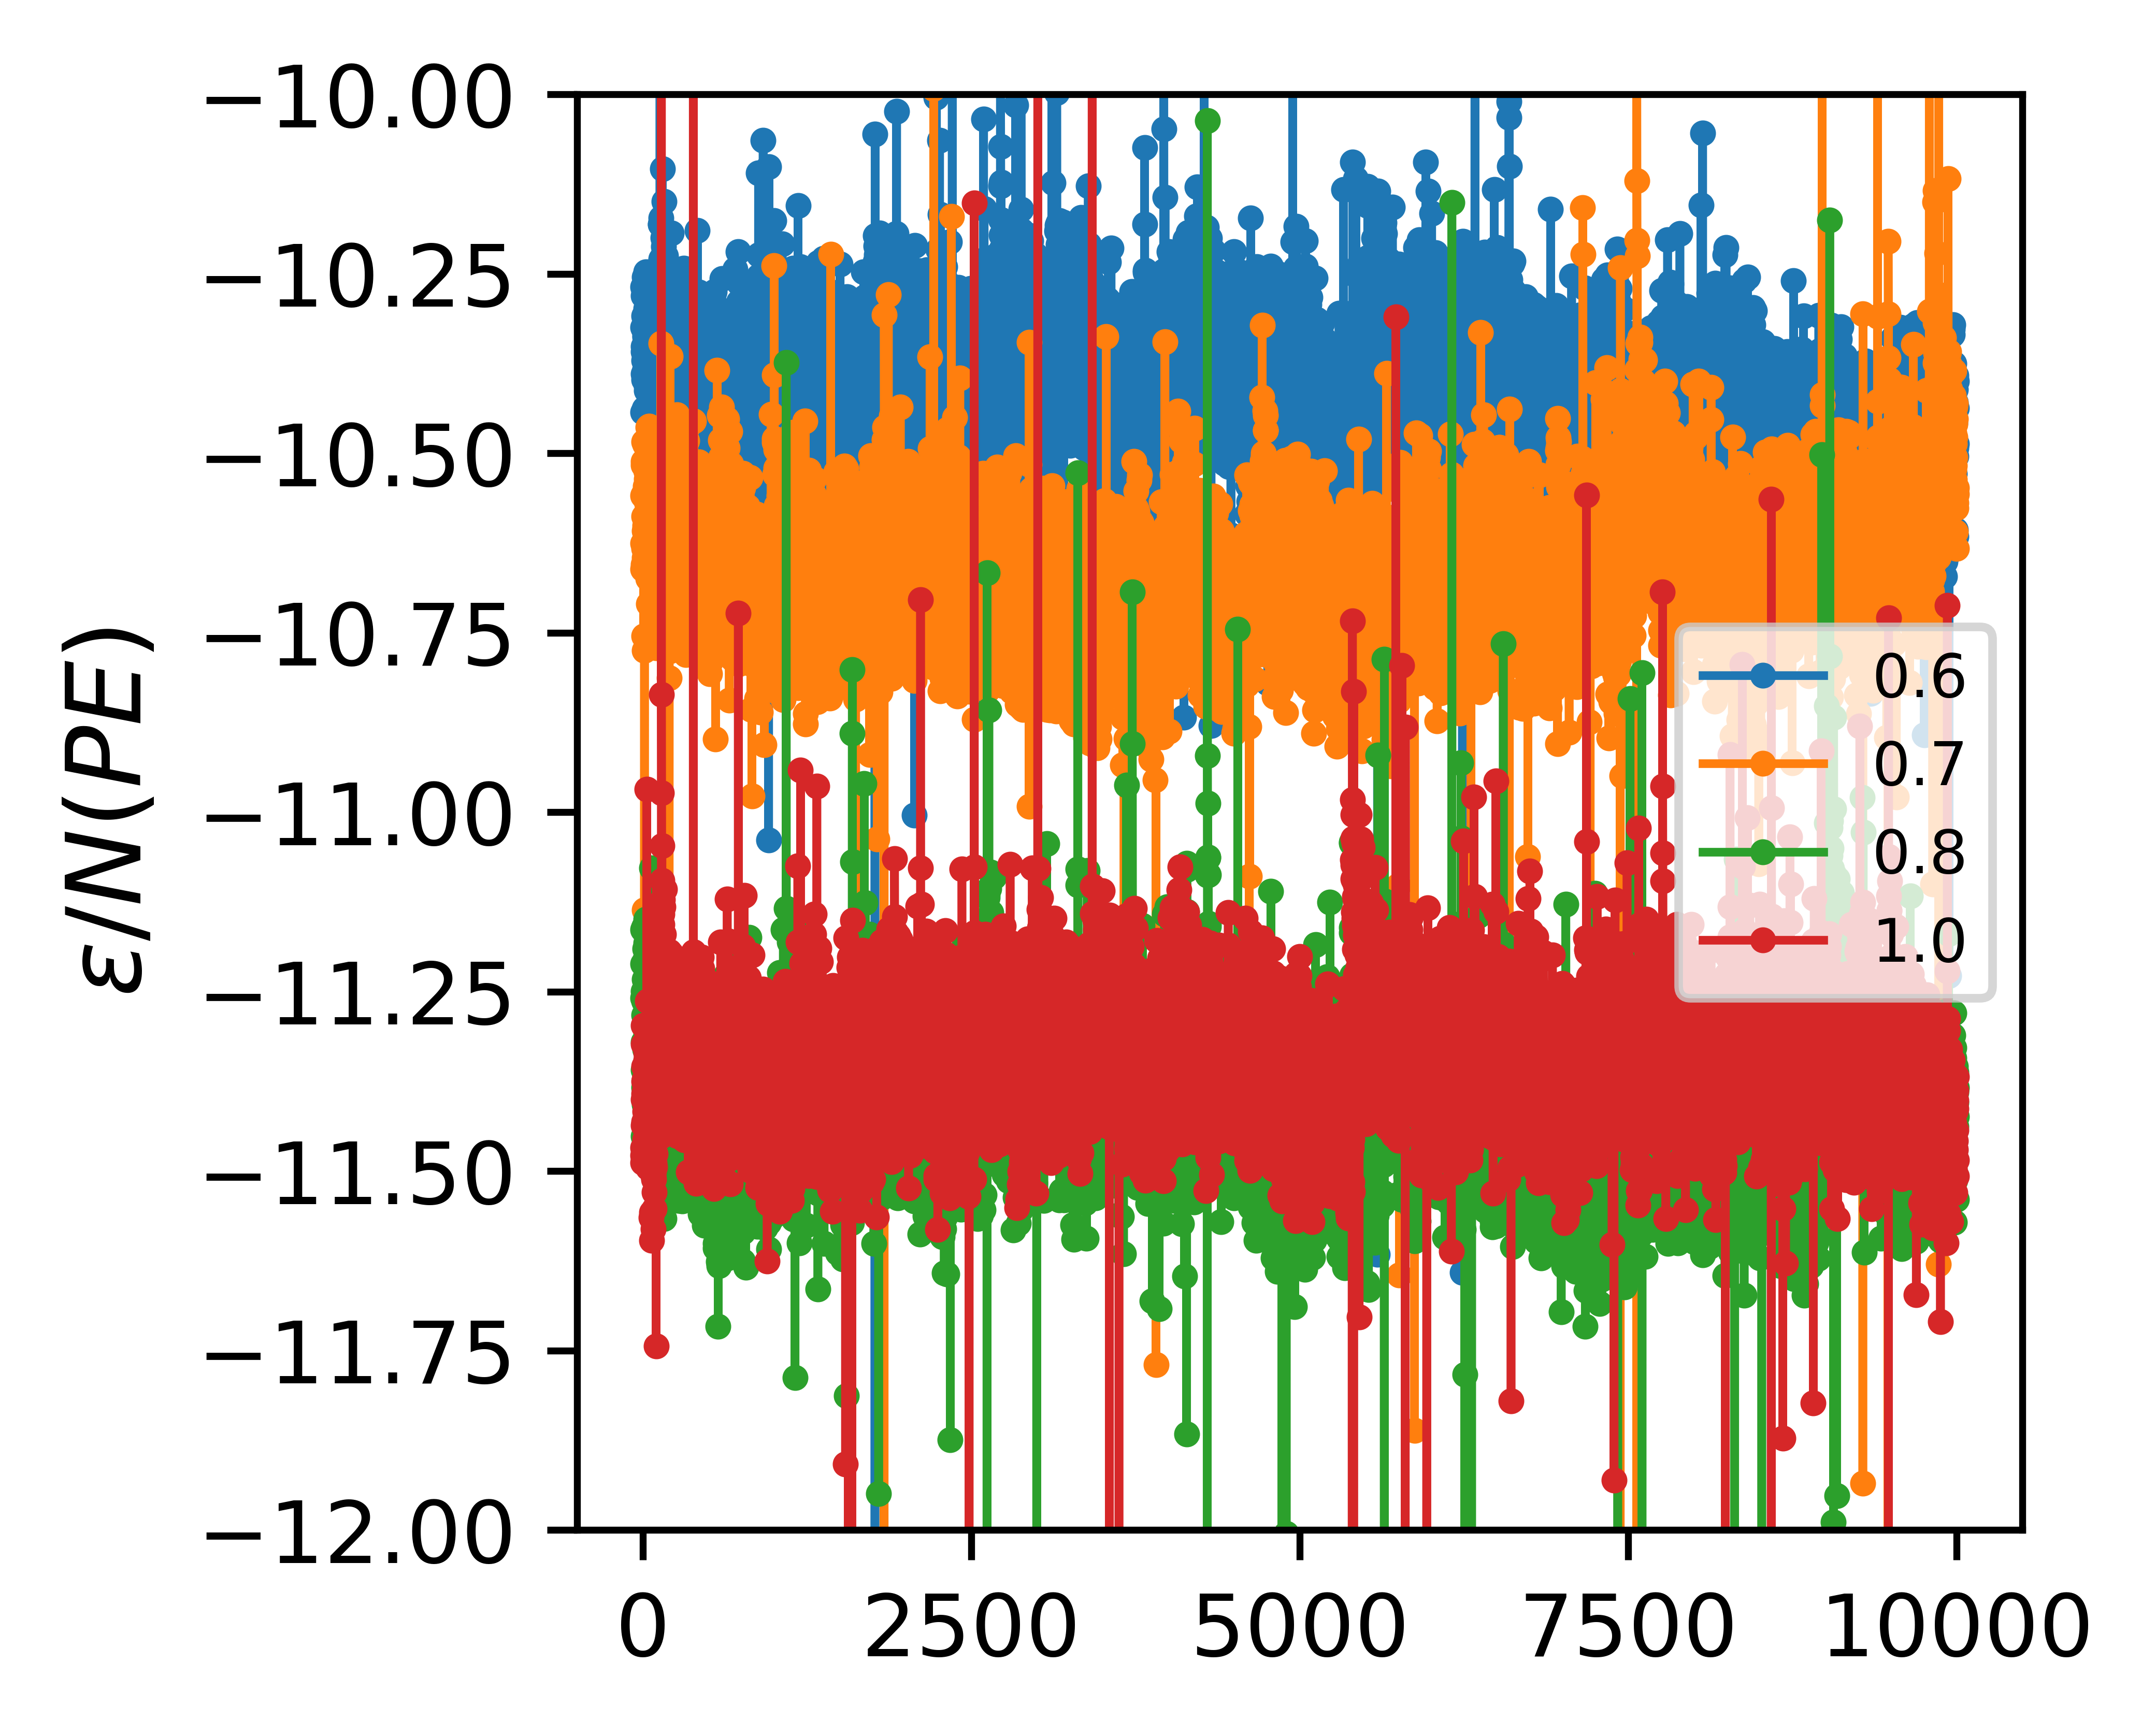

In [31]:
kT = 2.5
N = 50 * 20 * 3
index_cut = 3500
fig = plt.figure()

for weight, jobs in project.find_jobs({"cg_potentials_dir": "msibi-deep", "kT_quench": kT}).groupby("ekk_weight"):
    for job in jobs:
        data = np.genfromtxt(job.fn("sim_traj.txt"), names=True)
        pe = data["mdcomputeThermodynamicQuantitiespotential_energy"] / N
        results = is_equilibrated(data=pe[index_cut:])
        print(weight)
        print(results)
        print()
        plt.plot(pe[index_cut:], label=weight)
    
plt.legend()
plt.ylabel("$\epsilon/N (PE)$")
plt.ylim(-12, -10)
plt.show()